# Bayesian Optimization

In [1]:
import openturns as ot
import numpy as np
import matplotlib.pyplot as plt
from skgarden import RandomForestQuantileRegressor
from dependence.plots import set_style_paper
from skopt import forest_minimize
from skopt.acquisition import gaussian_ei

%matplotlib inline
%load_ext autoreload
%autoreload 2
set_style_paper()

In [76]:
class ModifiedRandomForestQuantileRegressor(RandomForestQuantileRegressor):
    def predict(self, X, return_std=False):
        """
        """
        X = np.asarray(X)
        alpha = 0.4
        if return_std:
            n_sample = X.shape[0]
            n_estimators = self.n_estimators
            pred = np.zeros((n_estimators, n_sample))
            for i, tree in enumerate(self.estimators_):
                pred[i] = tree.predict(X, quantile=alpha*100)

            mean = pred.mean(axis=0)
            std = pred.std(axis=0)
            return mean, std
        else:
            mean = RandomForestQuantileRegressor.predict(self, X, quantile=alpha*100)
            return mean

## On the dependence structure

In [3]:
from dependence.tests import func_sum
from dependence import ConservativeEstimate

def test_func(X):
    """
    """
    X = np.asarray(X)
    n = X.shape[0]
    y = -X.sum(axis=1)
    if n == 1:
        return y.item()
    else:
        return y

dim = 2
theta_min, theta_max = -0.999, 0.999
margins = [ot.GeneralizedPareto(1, 1)]*dim

families = np.zeros((dim, dim), dtype=int)
for i in range(1, dim):
    for j in range(i):
        families[i, j] = 1
        
quant_estimate = ConservativeEstimate(model_func=test_func, margins=margins, families=families)

## Grid-search

In [27]:
from dependence import quantile_func
n_theta = 30
n = 1000000
alpha = 0.4
q_func = quantile_func(alpha)
grid_results = quant_estimate.gridsearch(n_theta, n, q_func=q_func)

In [28]:
kendalls = grid_results.kendalls.ravel()
params = grid_results.dep_params.ravel()
quantities = grid_results.quantities.ravel()

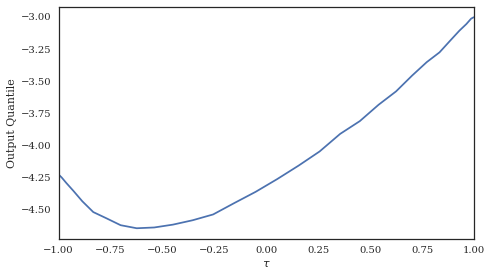

In [29]:
fig, ax = plt.subplots(figsize=(7, 4))

id_sort = params.argsort()
ax.plot(params[id_sort], quantities[id_sort])
ax.set_xlabel('$\\tau$')
ax.set_ylabel('Output Quantile')
ax.set_xlim(theta_min, theta_max)
fig.tight_layout()

In [77]:
objective = lambda x: quant_estimate.stochastic_function(x, 1, return_input_sample=False)

In [82]:
n_random_starts = 10000
n_iter = 10
n_estimators = 200
min_samples_split = max(2, int(n_random_starts/5))
rfq = ModifiedRandomForestQuantileRegressor(n_estimators, min_samples_split=min_samples_split, n_jobs=7)
n_calls = n_random_starts + n_iter
space = [(theta_min, theta_max)]
acq_func = 'EI'

opt_res = forest_minimize(objective, space, acq_func=acq_func, base_estimator=rfq,
                      n_calls=n_calls, n_random_starts=n_random_starts, n_jobs=7, verbose=True)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -1.7192
Current minimum: -1.7192
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -1.6870
Current minimum: -1.7192
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.1501
Current minimum: -2.1501
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -4.6881
Current minimum: -4.6881
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.9835
Current minimum: -4.6881
Iteration No: 6 started. 

Iteration No: 102 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -0.1920
Current minimum: -168.6163
Iteration No: 103 started. Evaluating function at random point.
Iteration No: 103 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.2226
Current minimum: -168.6163
Iteration No: 104 started. Evaluating function at random point.
Iteration No: 104 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.9860
Current minimum: -168.6163
Iteration No: 105 started. Evaluating function at random point.
Iteration No: 105 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -9.5052
Current minimum: -168.6163
Iteration No: 106 started. Evaluating function at random point.
Iteration No: 106 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.5103
Current minimum: -168.6163
Iteration No: 107 started. Evaluating function at random po

Time taken: 0.0050
Function value obtained: -0.4306
Current minimum: -355.3961
Iteration No: 303 started. Evaluating function at random point.
Iteration No: 303 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.0367
Current minimum: -355.3961
Iteration No: 304 started. Evaluating function at random point.
Iteration No: 304 ended. Evaluation done at random point.
Time taken: 0.0055
Function value obtained: -14.3310
Current minimum: -355.3961
Iteration No: 305 started. Evaluating function at random point.
Iteration No: 305 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -1.7518
Current minimum: -355.3961
Iteration No: 306 started. Evaluating function at random point.
Iteration No: 306 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.6591
Current minimum: -355.3961
Iteration No: 307 started. Evaluating function at random point.
Iteration No: 307 ended. Evaluation done at random p

Iteration No: 503 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -23.5053
Current minimum: -4795.2449
Iteration No: 504 started. Evaluating function at random point.
Iteration No: 504 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -0.4464
Current minimum: -4795.2449
Iteration No: 505 started. Evaluating function at random point.
Iteration No: 505 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -1.2457
Current minimum: -4795.2449
Iteration No: 506 started. Evaluating function at random point.
Iteration No: 506 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -3.4648
Current minimum: -4795.2449
Iteration No: 507 started. Evaluating function at random point.
Iteration No: 507 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -12.9479
Current minimum: -4795.2449
Iteration No: 508 started. Evaluating function at ra

Iteration No: 702 started. Evaluating function at random point.
Iteration No: 702 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -8.8723
Current minimum: -4795.2449
Iteration No: 703 started. Evaluating function at random point.
Iteration No: 703 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.2829
Current minimum: -4795.2449
Iteration No: 704 started. Evaluating function at random point.
Iteration No: 704 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -78.6270
Current minimum: -4795.2449
Iteration No: 705 started. Evaluating function at random point.
Iteration No: 705 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -9.6226
Current minimum: -4795.2449
Iteration No: 706 started. Evaluating function at random point.
Iteration No: 706 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.0625
Current minimum: 

Iteration No: 903 started. Evaluating function at random point.
Iteration No: 903 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -0.7568
Current minimum: -4795.2449
Iteration No: 904 started. Evaluating function at random point.
Iteration No: 904 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.4030
Current minimum: -4795.2449
Iteration No: 905 started. Evaluating function at random point.
Iteration No: 905 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.6751
Current minimum: -4795.2449
Iteration No: 906 started. Evaluating function at random point.
Iteration No: 906 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.1121
Current minimum: -4795.2449
Iteration No: 907 started. Evaluating function at random point.
Iteration No: 907 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -53.6308
Current minimum: 

Iteration No: 1103 ended. Evaluation done at random point.
Time taken: 0.0085
Function value obtained: -17.7103
Current minimum: -4795.2449
Iteration No: 1104 started. Evaluating function at random point.
Iteration No: 1104 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -0.9071
Current minimum: -4795.2449
Iteration No: 1105 started. Evaluating function at random point.
Iteration No: 1105 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -2.3894
Current minimum: -4795.2449
Iteration No: 1106 started. Evaluating function at random point.
Iteration No: 1106 ended. Evaluation done at random point.
Time taken: 0.0085
Function value obtained: -12.2977
Current minimum: -4795.2449
Iteration No: 1107 started. Evaluating function at random point.
Iteration No: 1107 ended. Evaluation done at random point.
Time taken: 0.0055
Function value obtained: -3.5941
Current minimum: -4795.2449
Iteration No: 1108 started. Evaluating func

Iteration No: 1301 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.6368
Current minimum: -5578.5077
Iteration No: 1302 started. Evaluating function at random point.
Iteration No: 1302 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.1954
Current minimum: -5578.5077
Iteration No: 1303 started. Evaluating function at random point.
Iteration No: 1303 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.9950
Current minimum: -5578.5077
Iteration No: 1304 started. Evaluating function at random point.
Iteration No: 1304 ended. Evaluation done at random point.
Time taken: 0.0036
Function value obtained: -5.8329
Current minimum: -5578.5077
Iteration No: 1305 started. Evaluating function at random point.
Iteration No: 1305 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.6502
Current minimum: -5578.5077
Iteration No: 1306 started. Evaluating functi

Current minimum: -5578.5077
Iteration No: 1503 started. Evaluating function at random point.
Iteration No: 1503 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -8.7374
Current minimum: -5578.5077
Iteration No: 1504 started. Evaluating function at random point.
Iteration No: 1504 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.7503
Current minimum: -5578.5077
Iteration No: 1505 started. Evaluating function at random point.
Iteration No: 1505 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -0.3553
Current minimum: -5578.5077
Iteration No: 1506 started. Evaluating function at random point.
Iteration No: 1506 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -4.5274
Current minimum: -5578.5077
Iteration No: 1507 started. Evaluating function at random point.
Iteration No: 1507 ended. Evaluation done at random point.
Time taken: 0.0046
Function valu

Function value obtained: -2.6277
Current minimum: -5578.5077
Iteration No: 1702 started. Evaluating function at random point.
Iteration No: 1702 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -6.6719
Current minimum: -5578.5077
Iteration No: 1703 started. Evaluating function at random point.
Iteration No: 1703 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -3.2802
Current minimum: -5578.5077
Iteration No: 1704 started. Evaluating function at random point.
Iteration No: 1704 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.6994
Current minimum: -5578.5077
Iteration No: 1705 started. Evaluating function at random point.
Iteration No: 1705 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.4079
Current minimum: -5578.5077
Iteration No: 1706 started. Evaluating function at random point.
Iteration No: 1706 ended. Evaluation done at random point.

Current minimum: -5578.5077
Iteration No: 1902 started. Evaluating function at random point.
Iteration No: 1902 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -0.2408
Current minimum: -5578.5077
Iteration No: 1903 started. Evaluating function at random point.
Iteration No: 1903 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -7.6856
Current minimum: -5578.5077
Iteration No: 1904 started. Evaluating function at random point.
Iteration No: 1904 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -3.0278
Current minimum: -5578.5077
Iteration No: 1905 started. Evaluating function at random point.
Iteration No: 1905 ended. Evaluation done at random point.
Time taken: 0.0042
Function value obtained: -69.2268
Current minimum: -5578.5077
Iteration No: 1906 started. Evaluating function at random point.
Iteration No: 1906 ended. Evaluation done at random point.
Time taken: 0.0045
Function val

Current minimum: -5578.5077
Iteration No: 2102 started. Evaluating function at random point.
Iteration No: 2102 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -9.7276
Current minimum: -5578.5077
Iteration No: 2103 started. Evaluating function at random point.
Iteration No: 2103 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.6917
Current minimum: -5578.5077
Iteration No: 2104 started. Evaluating function at random point.
Iteration No: 2104 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.8037
Current minimum: -5578.5077
Iteration No: 2105 started. Evaluating function at random point.
Iteration No: 2105 ended. Evaluation done at random point.
Time taken: 0.0048
Function value obtained: -0.8507
Current minimum: -5578.5077
Iteration No: 2106 started. Evaluating function at random point.
Iteration No: 2106 ended. Evaluation done at random point.
Time taken: 0.0052
Function valu

Iteration No: 2302 started. Evaluating function at random point.
Iteration No: 2302 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -4.6428
Current minimum: -5578.5077
Iteration No: 2303 started. Evaluating function at random point.
Iteration No: 2303 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -3.4882
Current minimum: -5578.5077
Iteration No: 2304 started. Evaluating function at random point.
Iteration No: 2304 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -7.2423
Current minimum: -5578.5077
Iteration No: 2305 started. Evaluating function at random point.
Iteration No: 2305 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.1761
Current minimum: -5578.5077
Iteration No: 2306 started. Evaluating function at random point.
Iteration No: 2306 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.7704
Current 

Iteration No: 2501 started. Evaluating function at random point.
Iteration No: 2501 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.2778
Current minimum: -5578.5077
Iteration No: 2502 started. Evaluating function at random point.
Iteration No: 2502 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -12.6853
Current minimum: -5578.5077
Iteration No: 2503 started. Evaluating function at random point.
Iteration No: 2503 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -10.1887
Current minimum: -5578.5077
Iteration No: 2504 started. Evaluating function at random point.
Iteration No: 2504 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -10.7870
Current minimum: -5578.5077
Iteration No: 2505 started. Evaluating function at random point.
Iteration No: 2505 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.1360
Curre

Time taken: 0.0030
Function value obtained: -4.1164
Current minimum: -5578.5077
Iteration No: 2702 started. Evaluating function at random point.
Iteration No: 2702 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -9.0232
Current minimum: -5578.5077
Iteration No: 2703 started. Evaluating function at random point.
Iteration No: 2703 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -21.6389
Current minimum: -5578.5077
Iteration No: 2704 started. Evaluating function at random point.
Iteration No: 2704 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -0.1493
Current minimum: -5578.5077
Iteration No: 2705 started. Evaluating function at random point.
Iteration No: 2705 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.5618
Current minimum: -5578.5077
Iteration No: 2706 started. Evaluating function at random point.
Iteration No: 2706 ended. Evaluation d

Current minimum: -5578.5077
Iteration No: 2902 started. Evaluating function at random point.
Iteration No: 2902 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -4.4110
Current minimum: -5578.5077
Iteration No: 2903 started. Evaluating function at random point.
Iteration No: 2903 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.5807
Current minimum: -5578.5077
Iteration No: 2904 started. Evaluating function at random point.
Iteration No: 2904 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -13.8209
Current minimum: -5578.5077
Iteration No: 2905 started. Evaluating function at random point.
Iteration No: 2905 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -4.4521
Current minimum: -5578.5077
Iteration No: 2906 started. Evaluating function at random point.
Iteration No: 2906 ended. Evaluation done at random point.
Time taken: 0.0040
Function val

Iteration No: 3102 started. Evaluating function at random point.
Iteration No: 3102 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.4404
Current minimum: -5578.5077
Iteration No: 3103 started. Evaluating function at random point.
Iteration No: 3103 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -8.7036
Current minimum: -5578.5077
Iteration No: 3104 started. Evaluating function at random point.
Iteration No: 3104 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -1.7372
Current minimum: -5578.5077
Iteration No: 3105 started. Evaluating function at random point.
Iteration No: 3105 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.2986
Current minimum: -5578.5077
Iteration No: 3106 started. Evaluating function at random point.
Iteration No: 3106 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -57.5714
Current

Current minimum: -5578.5077
Iteration No: 3302 started. Evaluating function at random point.
Iteration No: 3302 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -11.7078
Current minimum: -5578.5077
Iteration No: 3303 started. Evaluating function at random point.
Iteration No: 3303 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -6.3730
Current minimum: -5578.5077
Iteration No: 3304 started. Evaluating function at random point.
Iteration No: 3304 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.4416
Current minimum: -5578.5077
Iteration No: 3305 started. Evaluating function at random point.
Iteration No: 3305 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.6285
Current minimum: -5578.5077
Iteration No: 3306 started. Evaluating function at random point.
Iteration No: 3306 ended. Evaluation done at random point.
Time taken: 0.0030
Function val

Iteration No: 3501 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -27.9848
Current minimum: -5578.5077
Iteration No: 3502 started. Evaluating function at random point.
Iteration No: 3502 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.8295
Current minimum: -5578.5077
Iteration No: 3503 started. Evaluating function at random point.
Iteration No: 3503 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -0.8410
Current minimum: -5578.5077
Iteration No: 3504 started. Evaluating function at random point.
Iteration No: 3504 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.5585
Current minimum: -5578.5077
Iteration No: 3505 started. Evaluating function at random point.
Iteration No: 3505 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.9158
Current minimum: -5578.5077
Iteration No: 3506 started. Evaluating funct

Iteration No: 3701 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.7775
Current minimum: -5578.5077
Iteration No: 3702 started. Evaluating function at random point.
Iteration No: 3702 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.0009
Current minimum: -5578.5077
Iteration No: 3703 started. Evaluating function at random point.
Iteration No: 3703 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.7471
Current minimum: -5578.5077
Iteration No: 3704 started. Evaluating function at random point.
Iteration No: 3704 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -5.0516
Current minimum: -5578.5077
Iteration No: 3705 started. Evaluating function at random point.
Iteration No: 3705 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.6685
Current minimum: -5578.5077
Iteration No: 3706 started. Evaluating functi

Current minimum: -5578.5077
Iteration No: 3902 started. Evaluating function at random point.
Iteration No: 3902 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -0.2279
Current minimum: -5578.5077
Iteration No: 3903 started. Evaluating function at random point.
Iteration No: 3903 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -2.4877
Current minimum: -5578.5077
Iteration No: 3904 started. Evaluating function at random point.
Iteration No: 3904 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -18.3671
Current minimum: -5578.5077
Iteration No: 3905 started. Evaluating function at random point.
Iteration No: 3905 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -78.2775
Current minimum: -5578.5077
Iteration No: 3906 started. Evaluating function at random point.
Iteration No: 3906 ended. Evaluation done at random point.
Time taken: 0.0030
Function va

Current minimum: -15531.1740
Iteration No: 4101 started. Evaluating function at random point.
Iteration No: 4101 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.2431
Current minimum: -15531.1740
Iteration No: 4102 started. Evaluating function at random point.
Iteration No: 4102 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.2041
Current minimum: -15531.1740
Iteration No: 4103 started. Evaluating function at random point.
Iteration No: 4103 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.4588
Current minimum: -15531.1740
Iteration No: 4104 started. Evaluating function at random point.
Iteration No: 4104 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.4870
Current minimum: -15531.1740
Iteration No: 4105 started. Evaluating function at random point.
Iteration No: 4105 ended. Evaluation done at random point.
Time taken: 0.0040
Function

Time taken: 0.0040
Function value obtained: -2.9455
Current minimum: -15531.1740
Iteration No: 4301 started. Evaluating function at random point.
Iteration No: 4301 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -7.9722
Current minimum: -15531.1740
Iteration No: 4302 started. Evaluating function at random point.
Iteration No: 4302 ended. Evaluation done at random point.
Time taken: 0.0051
Function value obtained: -2.0960
Current minimum: -15531.1740
Iteration No: 4303 started. Evaluating function at random point.
Iteration No: 4303 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -4.0806
Current minimum: -15531.1740
Iteration No: 4304 started. Evaluating function at random point.
Iteration No: 4304 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -4.1104
Current minimum: -15531.1740
Iteration No: 4305 started. Evaluating function at random point.
Iteration No: 4305 ended. Evaluati

Time taken: 0.0030
Function value obtained: -141.9782
Current minimum: -15531.1740
Iteration No: 4503 started. Evaluating function at random point.
Iteration No: 4503 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -0.7828
Current minimum: -15531.1740
Iteration No: 4504 started. Evaluating function at random point.
Iteration No: 4504 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -53.2148
Current minimum: -15531.1740
Iteration No: 4505 started. Evaluating function at random point.
Iteration No: 4505 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.6604
Current minimum: -15531.1740
Iteration No: 4506 started. Evaluating function at random point.
Iteration No: 4506 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.3705
Current minimum: -15531.1740
Iteration No: 4507 started. Evaluating function at random point.
Iteration No: 4507 ended. Evalu

Current minimum: -15531.1740
Iteration No: 4700 started. Evaluating function at random point.
Iteration No: 4700 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -30.4529
Current minimum: -15531.1740
Iteration No: 4701 started. Evaluating function at random point.
Iteration No: 4701 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.4288
Current minimum: -15531.1740
Iteration No: 4702 started. Evaluating function at random point.
Iteration No: 4702 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -35.7662
Current minimum: -15531.1740
Iteration No: 4703 started. Evaluating function at random point.
Iteration No: 4703 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.1714
Current minimum: -15531.1740
Iteration No: 4704 started. Evaluating function at random point.
Iteration No: 4704 ended. Evaluation done at random point.
Time taken: 0.0040
Functi

Function value obtained: -0.9002
Current minimum: -15531.1740
Iteration No: 4901 started. Evaluating function at random point.
Iteration No: 4901 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.5915
Current minimum: -15531.1740
Iteration No: 4902 started. Evaluating function at random point.
Iteration No: 4902 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.8231
Current minimum: -15531.1740
Iteration No: 4903 started. Evaluating function at random point.
Iteration No: 4903 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -1.8416
Current minimum: -15531.1740
Iteration No: 4904 started. Evaluating function at random point.
Iteration No: 4904 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -0.4061
Current minimum: -15531.1740
Iteration No: 4905 started. Evaluating function at random point.
Iteration No: 4905 ended. Evaluation done at random p

Current minimum: -15531.1740
Iteration No: 5100 started. Evaluating function at random point.
Iteration No: 5100 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -80.0494
Current minimum: -15531.1740
Iteration No: 5101 started. Evaluating function at random point.
Iteration No: 5101 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.6881
Current minimum: -15531.1740
Iteration No: 5102 started. Evaluating function at random point.
Iteration No: 5102 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -5.0544
Current minimum: -15531.1740
Iteration No: 5103 started. Evaluating function at random point.
Iteration No: 5103 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -65.0446
Current minimum: -15531.1740
Iteration No: 5104 started. Evaluating function at random point.
Iteration No: 5104 ended. Evaluation done at random point.
Time taken: 0.0035
Functi

Time taken: 0.0041
Function value obtained: -1.3041
Current minimum: -15531.1740
Iteration No: 5301 started. Evaluating function at random point.
Iteration No: 5301 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.9736
Current minimum: -15531.1740
Iteration No: 5302 started. Evaluating function at random point.
Iteration No: 5302 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -0.7491
Current minimum: -15531.1740
Iteration No: 5303 started. Evaluating function at random point.
Iteration No: 5303 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.3343
Current minimum: -15531.1740
Iteration No: 5304 started. Evaluating function at random point.
Iteration No: 5304 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -7.8086
Current minimum: -15531.1740
Iteration No: 5305 started. Evaluating function at random point.
Iteration No: 5305 ended. Evaluati

Current minimum: -15531.1740
Iteration No: 5501 started. Evaluating function at random point.
Iteration No: 5501 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -3.4440
Current minimum: -15531.1740
Iteration No: 5502 started. Evaluating function at random point.
Iteration No: 5502 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -6.5816
Current minimum: -15531.1740
Iteration No: 5503 started. Evaluating function at random point.
Iteration No: 5503 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -0.4150
Current minimum: -15531.1740
Iteration No: 5504 started. Evaluating function at random point.
Iteration No: 5504 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -7.3450
Current minimum: -15531.1740
Iteration No: 5505 started. Evaluating function at random point.
Iteration No: 5505 ended. Evaluation done at random point.
Time taken: 0.0035
Function

Current minimum: -15531.1740
Iteration No: 5700 started. Evaluating function at random point.
Iteration No: 5700 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -1.9113
Current minimum: -15531.1740
Iteration No: 5701 started. Evaluating function at random point.
Iteration No: 5701 ended. Evaluation done at random point.
Time taken: 0.0046
Function value obtained: -3.8202
Current minimum: -15531.1740
Iteration No: 5702 started. Evaluating function at random point.
Iteration No: 5702 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -7.0659
Current minimum: -15531.1740
Iteration No: 5703 started. Evaluating function at random point.
Iteration No: 5703 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -11.5296
Current minimum: -15531.1740
Iteration No: 5704 started. Evaluating function at random point.
Iteration No: 5704 ended. Evaluation done at random point.
Time taken: 0.0060
Functio

Current minimum: -15531.1740
Iteration No: 5900 started. Evaluating function at random point.
Iteration No: 5900 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.2616
Current minimum: -15531.1740
Iteration No: 5901 started. Evaluating function at random point.
Iteration No: 5901 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -22.2015
Current minimum: -15531.1740
Iteration No: 5902 started. Evaluating function at random point.
Iteration No: 5902 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -9.6519
Current minimum: -15531.1740
Iteration No: 5903 started. Evaluating function at random point.
Iteration No: 5903 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -4.3656
Current minimum: -15531.1740
Iteration No: 5904 started. Evaluating function at random point.
Iteration No: 5904 ended. Evaluation done at random point.
Time taken: 0.0045
Functio

Current minimum: -15531.1740
Iteration No: 6099 started. Evaluating function at random point.
Iteration No: 6099 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.8685
Current minimum: -15531.1740
Iteration No: 6100 started. Evaluating function at random point.
Iteration No: 6100 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.7026
Current minimum: -15531.1740
Iteration No: 6101 started. Evaluating function at random point.
Iteration No: 6101 ended. Evaluation done at random point.
Time taken: 0.0036
Function value obtained: -10.3443
Current minimum: -15531.1740
Iteration No: 6102 started. Evaluating function at random point.
Iteration No: 6102 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -2.3721
Current minimum: -15531.1740
Iteration No: 6103 started. Evaluating function at random point.
Iteration No: 6103 ended. Evaluation done at random point.
Time taken: 0.0035
Functio

Iteration No: 6300 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.8180
Current minimum: -15531.1740
Iteration No: 6301 started. Evaluating function at random point.
Iteration No: 6301 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.3197
Current minimum: -15531.1740
Iteration No: 6302 started. Evaluating function at random point.
Iteration No: 6302 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -4.9762
Current minimum: -15531.1740
Iteration No: 6303 started. Evaluating function at random point.
Iteration No: 6303 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.3208
Current minimum: -15531.1740
Iteration No: 6304 started. Evaluating function at random point.
Iteration No: 6304 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -0.7943
Current minimum: -15531.1740
Iteration No: 6305 started. Evaluating f

Iteration No: 6500 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.8929
Current minimum: -15531.1740
Iteration No: 6501 started. Evaluating function at random point.
Iteration No: 6501 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -2.4146
Current minimum: -15531.1740
Iteration No: 6502 started. Evaluating function at random point.
Iteration No: 6502 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.6875
Current minimum: -15531.1740
Iteration No: 6503 started. Evaluating function at random point.
Iteration No: 6503 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -8.4944
Current minimum: -15531.1740
Iteration No: 6504 started. Evaluating function at random point.
Iteration No: 6504 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -7.8372
Current minimum: -15531.1740
Iteration No: 6505 started. Evaluating f

Time taken: 0.0035
Function value obtained: -19.2189
Current minimum: -15531.1740
Iteration No: 6699 started. Evaluating function at random point.
Iteration No: 6699 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -12.7517
Current minimum: -15531.1740
Iteration No: 6700 started. Evaluating function at random point.
Iteration No: 6700 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.4626
Current minimum: -15531.1740
Iteration No: 6701 started. Evaluating function at random point.
Iteration No: 6701 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -2.7642
Current minimum: -15531.1740
Iteration No: 6702 started. Evaluating function at random point.
Iteration No: 6702 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -21.6135
Current minimum: -15531.1740
Iteration No: 6703 started. Evaluating function at random point.
Iteration No: 6703 ended. Evalu

Iteration No: 6899 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.3639
Current minimum: -15531.1740
Iteration No: 6900 started. Evaluating function at random point.
Iteration No: 6900 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -0.5465
Current minimum: -15531.1740
Iteration No: 6901 started. Evaluating function at random point.
Iteration No: 6901 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -38.4415
Current minimum: -15531.1740
Iteration No: 6902 started. Evaluating function at random point.
Iteration No: 6902 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -4.8138
Current minimum: -15531.1740
Iteration No: 6903 started. Evaluating function at random point.
Iteration No: 6903 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -8.1184
Current minimum: -15531.1740
Iteration No: 6904 started. Evaluating 

Iteration No: 7099 started. Evaluating function at random point.
Iteration No: 7099 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.2409
Current minimum: -15531.1740
Iteration No: 7100 started. Evaluating function at random point.
Iteration No: 7100 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.0823
Current minimum: -15531.1740
Iteration No: 7101 started. Evaluating function at random point.
Iteration No: 7101 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -2.3074
Current minimum: -15531.1740
Iteration No: 7102 started. Evaluating function at random point.
Iteration No: 7102 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -2.7376
Current minimum: -15531.1740
Iteration No: 7103 started. Evaluating function at random point.
Iteration No: 7103 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -58.0824
Cur

Time taken: 0.0045
Function value obtained: -17.5717
Current minimum: -15531.1740
Iteration No: 7299 started. Evaluating function at random point.
Iteration No: 7299 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.5758
Current minimum: -15531.1740
Iteration No: 7300 started. Evaluating function at random point.
Iteration No: 7300 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -19.3149
Current minimum: -15531.1740
Iteration No: 7301 started. Evaluating function at random point.
Iteration No: 7301 ended. Evaluation done at random point.
Time taken: 0.0061
Function value obtained: -5.0188
Current minimum: -15531.1740
Iteration No: 7302 started. Evaluating function at random point.
Iteration No: 7302 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.7803
Current minimum: -15531.1740
Iteration No: 7303 started. Evaluating function at random point.
Iteration No: 7303 ended. Evalua

Time taken: 0.0040
Function value obtained: -3.4106
Current minimum: -15531.1740
Iteration No: 7500 started. Evaluating function at random point.
Iteration No: 7500 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -2.9144
Current minimum: -15531.1740
Iteration No: 7501 started. Evaluating function at random point.
Iteration No: 7501 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.4326
Current minimum: -15531.1740
Iteration No: 7502 started. Evaluating function at random point.
Iteration No: 7502 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.0887
Current minimum: -15531.1740
Iteration No: 7503 started. Evaluating function at random point.
Iteration No: 7503 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -11.4083
Current minimum: -15531.1740
Iteration No: 7504 started. Evaluating function at random point.
Iteration No: 7504 ended. Evaluat

Current minimum: -15531.1740
Iteration No: 7699 started. Evaluating function at random point.
Iteration No: 7699 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.5924
Current minimum: -15531.1740
Iteration No: 7700 started. Evaluating function at random point.
Iteration No: 7700 ended. Evaluation done at random point.
Time taken: 0.0036
Function value obtained: -3.3094
Current minimum: -15531.1740
Iteration No: 7701 started. Evaluating function at random point.
Iteration No: 7701 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.8388
Current minimum: -15531.1740
Iteration No: 7702 started. Evaluating function at random point.
Iteration No: 7702 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -3.3533
Current minimum: -15531.1740
Iteration No: 7703 started. Evaluating function at random point.
Iteration No: 7703 ended. Evaluation done at random point.
Time taken: 0.0040
Function

Iteration No: 7898 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.9164
Current minimum: -15531.1740
Iteration No: 7899 started. Evaluating function at random point.
Iteration No: 7899 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.1892
Current minimum: -15531.1740
Iteration No: 7900 started. Evaluating function at random point.
Iteration No: 7900 ended. Evaluation done at random point.
Time taken: 0.0036
Function value obtained: -5.8816
Current minimum: -15531.1740
Iteration No: 7901 started. Evaluating function at random point.
Iteration No: 7901 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.0469
Current minimum: -15531.1740
Iteration No: 7902 started. Evaluating function at random point.
Iteration No: 7902 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.8250
Current minimum: -15531.1740
Iteration No: 7903 started. Evaluating f

Time taken: 0.0050
Function value obtained: -1.8292
Current minimum: -15531.1740
Iteration No: 8099 started. Evaluating function at random point.
Iteration No: 8099 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -19.3413
Current minimum: -15531.1740
Iteration No: 8100 started. Evaluating function at random point.
Iteration No: 8100 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -59.8948
Current minimum: -15531.1740
Iteration No: 8101 started. Evaluating function at random point.
Iteration No: 8101 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -8.8292
Current minimum: -15531.1740
Iteration No: 8102 started. Evaluating function at random point.
Iteration No: 8102 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.7950
Current minimum: -15531.1740
Iteration No: 8103 started. Evaluating function at random point.
Iteration No: 8103 ended. Evalua

Iteration No: 8297 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -4.0507
Current minimum: -15531.1740
Iteration No: 8298 started. Evaluating function at random point.
Iteration No: 8298 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -0.3353
Current minimum: -15531.1740
Iteration No: 8299 started. Evaluating function at random point.
Iteration No: 8299 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -17.8254
Current minimum: -15531.1740
Iteration No: 8300 started. Evaluating function at random point.
Iteration No: 8300 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.3106
Current minimum: -15531.1740
Iteration No: 8301 started. Evaluating function at random point.
Iteration No: 8301 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.9277
Current minimum: -15531.1740
Iteration No: 8302 started. Evaluating 

Iteration No: 8498 started. Evaluating function at random point.
Iteration No: 8498 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -4.9241
Current minimum: -15531.1740
Iteration No: 8499 started. Evaluating function at random point.
Iteration No: 8499 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -30.2609
Current minimum: -15531.1740
Iteration No: 8500 started. Evaluating function at random point.
Iteration No: 8500 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -14.1344
Current minimum: -15531.1740
Iteration No: 8501 started. Evaluating function at random point.
Iteration No: 8501 ended. Evaluation done at random point.
Time taken: 0.0050
Function value obtained: -3.8975
Current minimum: -15531.1740
Iteration No: 8502 started. Evaluating function at random point.
Iteration No: 8502 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -3.2717
Cu

Current minimum: -15531.1740
Iteration No: 8698 started. Evaluating function at random point.
Iteration No: 8698 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -6.0354
Current minimum: -15531.1740
Iteration No: 8699 started. Evaluating function at random point.
Iteration No: 8699 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -46.0321
Current minimum: -15531.1740
Iteration No: 8700 started. Evaluating function at random point.
Iteration No: 8700 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -0.1692
Current minimum: -15531.1740
Iteration No: 8701 started. Evaluating function at random point.
Iteration No: 8701 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -1.3077
Current minimum: -15531.1740
Iteration No: 8702 started. Evaluating function at random point.
Iteration No: 8702 ended. Evaluation done at random point.
Time taken: 0.0066
Functio

Time taken: 0.0050
Function value obtained: -44.0307
Current minimum: -15531.1740
Iteration No: 8897 started. Evaluating function at random point.
Iteration No: 8897 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.0851
Current minimum: -15531.1740
Iteration No: 8898 started. Evaluating function at random point.
Iteration No: 8898 ended. Evaluation done at random point.
Time taken: 0.0070
Function value obtained: -0.4359
Current minimum: -15531.1740
Iteration No: 8899 started. Evaluating function at random point.
Iteration No: 8899 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -5.3770
Current minimum: -15531.1740
Iteration No: 8900 started. Evaluating function at random point.
Iteration No: 8900 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.6855
Current minimum: -15531.1740
Iteration No: 8901 started. Evaluating function at random point.
Iteration No: 8901 ended. Evaluat

Iteration No: 9097 started. Evaluating function at random point.
Iteration No: 9097 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -7.6283
Current minimum: -15531.1740
Iteration No: 9098 started. Evaluating function at random point.
Iteration No: 9098 ended. Evaluation done at random point.
Time taken: 0.0030
Function value obtained: -4.5739
Current minimum: -15531.1740
Iteration No: 9099 started. Evaluating function at random point.
Iteration No: 9099 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -19.8942
Current minimum: -15531.1740
Iteration No: 9100 started. Evaluating function at random point.
Iteration No: 9100 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.8671
Current minimum: -15531.1740
Iteration No: 9101 started. Evaluating function at random point.
Iteration No: 9101 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -7.4430
Cur

Iteration No: 9298 started. Evaluating function at random point.
Iteration No: 9298 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -1.4629
Current minimum: -15531.1740
Iteration No: 9299 started. Evaluating function at random point.
Iteration No: 9299 ended. Evaluation done at random point.
Time taken: 0.0041
Function value obtained: -3.7332
Current minimum: -15531.1740
Iteration No: 9300 started. Evaluating function at random point.
Iteration No: 9300 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.9621
Current minimum: -15531.1740
Iteration No: 9301 started. Evaluating function at random point.
Iteration No: 9301 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -3.4603
Current minimum: -15531.1740
Iteration No: 9302 started. Evaluating function at random point.
Iteration No: 9302 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -7.3189
Curr

Function value obtained: -18.7501
Current minimum: -15531.1740
Iteration No: 9497 started. Evaluating function at random point.
Iteration No: 9497 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -1.8181
Current minimum: -15531.1740
Iteration No: 9498 started. Evaluating function at random point.
Iteration No: 9498 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -3.4302
Current minimum: -15531.1740
Iteration No: 9499 started. Evaluating function at random point.
Iteration No: 9499 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -2.2352
Current minimum: -15531.1740
Iteration No: 9500 started. Evaluating function at random point.
Iteration No: 9500 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -6.7445
Current minimum: -15531.1740
Iteration No: 9501 started. Evaluating function at random point.
Iteration No: 9501 ended. Evaluation done at random 

Function value obtained: -4.9702
Current minimum: -15531.1740
Iteration No: 9697 started. Evaluating function at random point.
Iteration No: 9697 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -2.7840
Current minimum: -15531.1740
Iteration No: 9698 started. Evaluating function at random point.
Iteration No: 9698 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -4.6333
Current minimum: -15531.1740
Iteration No: 9699 started. Evaluating function at random point.
Iteration No: 9699 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -0.9831
Current minimum: -15531.1740
Iteration No: 9700 started. Evaluating function at random point.
Iteration No: 9700 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -4.7546
Current minimum: -15531.1740
Iteration No: 9701 started. Evaluating function at random point.
Iteration No: 9701 ended. Evaluation done at random p

Time taken: 0.0040
Function value obtained: -2.3156
Current minimum: -15531.1740
Iteration No: 9906 started. Evaluating function at random point.
Iteration No: 9906 ended. Evaluation done at random point.
Time taken: 0.0045
Function value obtained: -4.7982
Current minimum: -15531.1740
Iteration No: 9907 started. Evaluating function at random point.
Iteration No: 9907 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -2.0109
Current minimum: -15531.1740
Iteration No: 9908 started. Evaluating function at random point.
Iteration No: 9908 ended. Evaluation done at random point.
Time taken: 0.0035
Function value obtained: -6.3336
Current minimum: -15531.1740
Iteration No: 9909 started. Evaluating function at random point.
Iteration No: 9909 ended. Evaluation done at random point.
Time taken: 0.0040
Function value obtained: -5.4219
Current minimum: -15531.1740
Iteration No: 9910 started. Evaluating function at random point.
Iteration No: 9910 ended. Evaluati

Iteration No: 10001 ended. Search finished for the next optimal point.
Time taken: 1.3378
Function value obtained: -0.6829
Current minimum: -15531.1740
Iteration No: 10002 started. Searching for the next optimal point.
Iteration No: 10002 ended. Search finished for the next optimal point.
Time taken: 1.2760
Function value obtained: -7.8645
Current minimum: -15531.1740
Iteration No: 10003 started. Searching for the next optimal point.
Iteration No: 10003 ended. Search finished for the next optimal point.
Time taken: 1.3362
Function value obtained: -1.0495
Current minimum: -15531.1740
Iteration No: 10004 started. Searching for the next optimal point.
Iteration No: 10004 ended. Search finished for the next optimal point.
Time taken: 1.3744
Function value obtained: -2.3468
Current minimum: -15531.1740
Iteration No: 10005 started. Searching for the next optimal point.
Iteration No: 10005 ended. Search finished for the next optimal point.
Time taken: 1.3541
Function value obtained: -3.6206
C

In [83]:
x = opt_res.x_iters
y = opt_res.func_vals
x_random_start = x[:n_random_starts]
y_random_start = y[:n_random_starts]

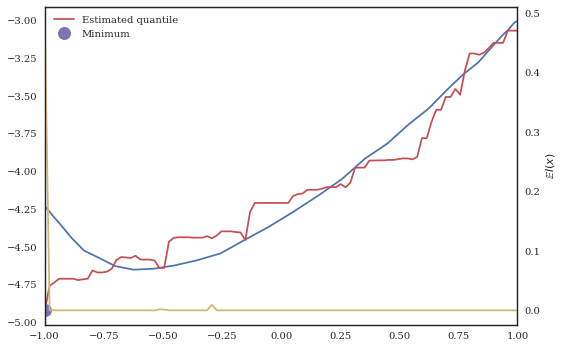

In [84]:
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = ax.twinx()
ax2.set_ylabel("$\mathbb{E}I(x)$")
#ax.plot(x_random_start, y_random_start, 'b.', label='Random-start')
id_sort = params.argsort()
ax.plot(params[id_sort], quantities[id_sort])
axmin, axmax = quantities.min(), quantities.max()
#ax.set_ylim(axmin, axmax)
ax.set_xlim(theta_min, theta_max)

def init():
    line_acq, = ax2.plot([], [], "y", label="$\mathbb{E}I(x)$")
    #line_iter, = ax.plot([], [], 'r.', label='Iterations')
    line_quant, = ax.plot([], [], 'r-', label='Estimated quantile')
    line_min, = ax.plot([], [], 'mo', markersize=13, label='Minimum')
    return (line_acq, line_quant, line_min, )

#line_acq, line_quant, line_min = init()
i = 10

model_i = opt_res.models[i]
q_i = model_i.predict(x_plot[:, np.newaxis])
acq = gaussian_ei(x_plot[:, np.newaxis], model_i, y_opt=np.min(q_i))
x_iter = x[n_random_starts:n_random_starts+i+1]
y_iter = y[n_random_starts:n_random_starts+i+1]
id_min = q_i.argmin()
x_min = x_plot[id_min]
q_min = q_i[id_min]

ax2.plot(x_plot, acq, "y", label="$\mathbb{E}I(x)$")
line_quant, = ax.plot(x_plot, q_i, 'r-', label='Estimated quantile')
line_min, = ax.plot(x_min, q_min, 'mo', markersize=13, label='Minimum')

ax.legend(loc=0)
fig.tight_layout()

In [65]:
x_plot = np.linspace(theta_min, theta_max, 100)

def animate(i):
    model_i = opt_res.models[i]
    q_i = model_i.predict(x_plot[:, np.newaxis])
    acq = gaussian_ei(x_plot[:, np.newaxis], model_i, y_opt=np.min(q_i))
    x_iter = x[n_random_starts:n_random_starts+i+1]
    y_iter = y[n_random_starts:n_random_starts+i+1]
    id_min = q_i.argmin()
    x_min = x_plot[id_min]
    q_min = q_i[id_min]
    
    line_acq.set_data(x_plot, acq)
    #line_iter.set_data(x_iter, y_iter)
    line_quant.set_data(x_plot, q_i)
    line_min.set_data(x_min, q_min)
    ax.title.set_text('n_start = %d - iteration %d' % (n_random_starts, i+1))
    print(i)
    return (line_acq, line_quant, line_min, )

In [66]:
from matplotlib import animation

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_iter, interval=1, blit=True)

In [67]:
filename = 'dep_bayesian_optim_ns_%d_niter_%d_%s.gif' % (n_random_starts, n_iter, acq_func)

anim.save(filename, writer='imagemagick', fps=2)

0
1
2
3
4
5
6
7
8
9


In [41]:
model = opt_res.models[-1]
x = np.asarray(opt_res.x_iters)
q = model.predict(x)
x_random_start = x[:n_random_start]
x_iter = x[n_random_start:]
y_random_start = q[:n_random_start]
y_iter = q[n_random_start:]
id_min = q.argmin()
x_min = x[id_min]
q_min = q[id_min]
acq = gaussian_ei(x, model, y_opt=np.min(q))

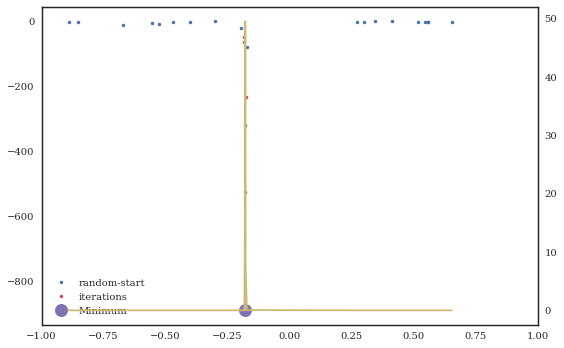

In [42]:
fig, ax = plt.subplots(figsize=(8, 5))
ax2 = ax.twinx()
id_sort = np.argsort(x, 0).ravel()
ax2.plot(x[id_sort], acq[id_sort], "y", label="EI(x)")
ax.plot(x_random_start, y_random_start, 'b.', label='random-start')
ax.plot(x_iter, y_iter, 'r.', label='iterations')
ax.plot(x_min, q_min, 'mo', markersize=13, label='Minimum')
ax.legend(loc=0)
ax.set_xlim(theta_min, theta_max)
fig.tight_layout()
#fig.savefig('bayesian-optim-test.pdf')